In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
from torch.utils.data import DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [3]:
data = pd.read_csv('creditcard.csv')
print (data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [3]:
fraud_case = data[data['Class']==1]
ok_case = data[data['Class']==0]

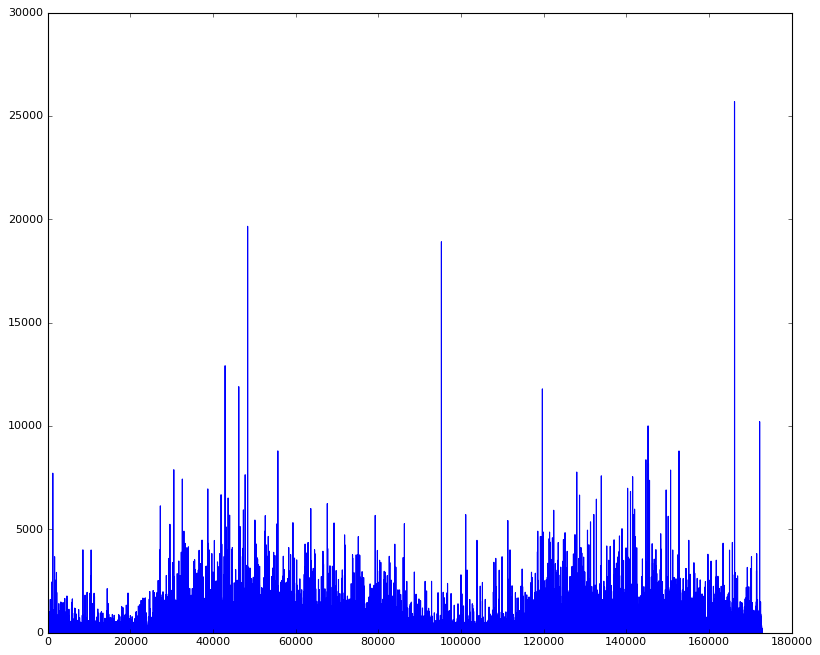

In [4]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data['Time'], data['Amount'])

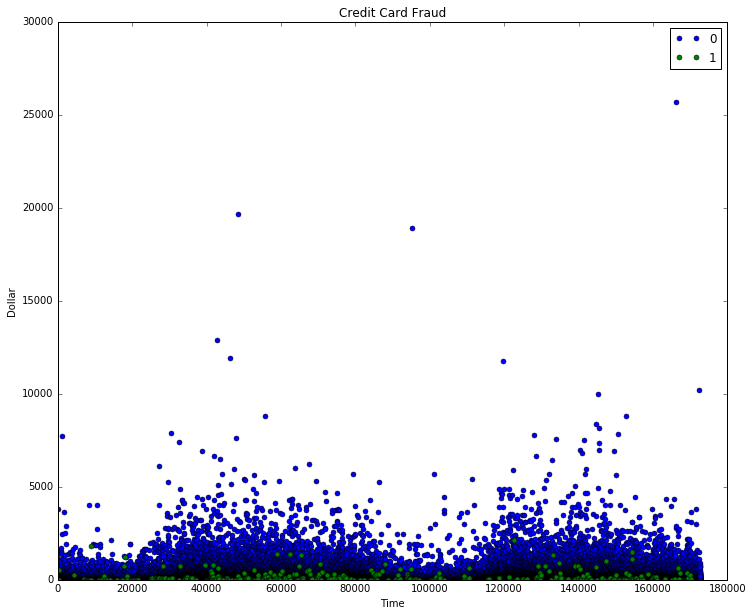

In [5]:
groups = data.groupby('Class')

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.title('Credit Card Fraud')
for name,group in groups:
    ax.plot(group.Time, group.Amount, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('Time')
plt.ylabel('Dollar')
plt.show()

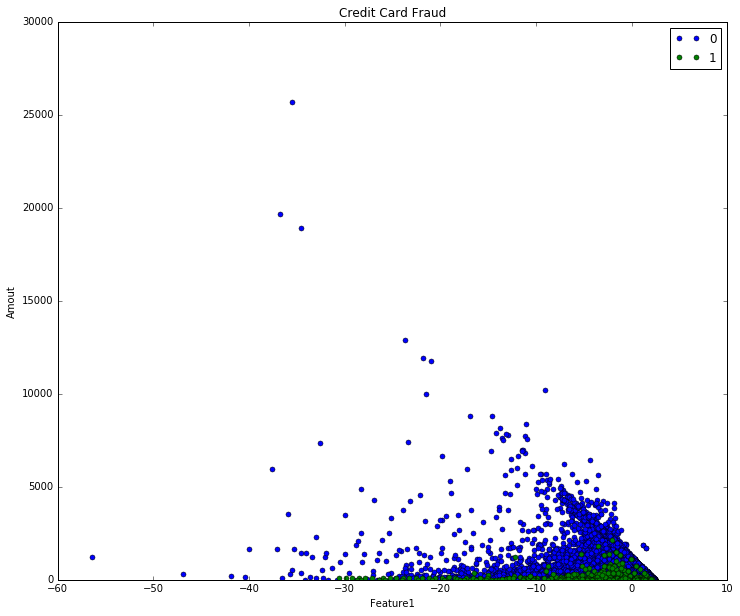

In [6]:
groups = data.groupby('Class')

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.title('Credit Card Fraud')
for name,group in groups:
    ax.plot(group.V1, group.Amount, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('Feature1')
plt.ylabel('Amout')
plt.show()

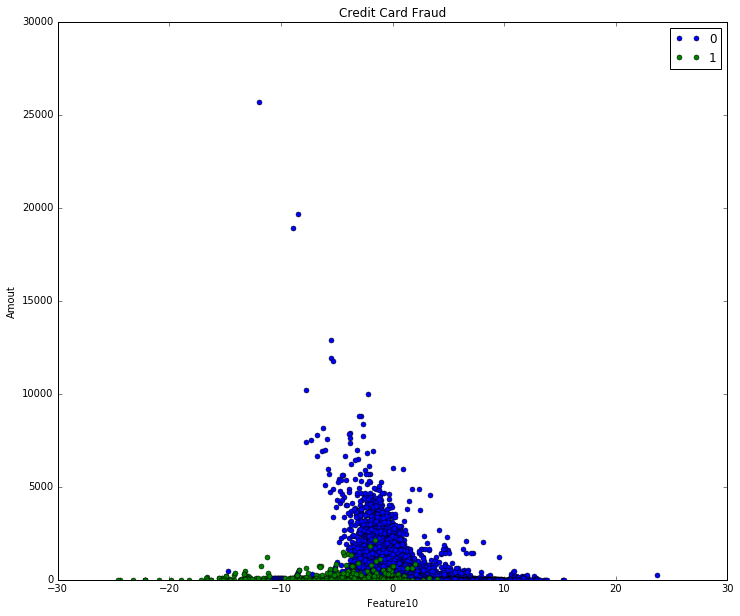

In [7]:
groups = data.groupby('Class')

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.title('Credit Card Fraud')
for name,group in groups:
    ax.plot(group.V10, group.Amount, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('Feature10')
plt.ylabel('Amout')
plt.show()

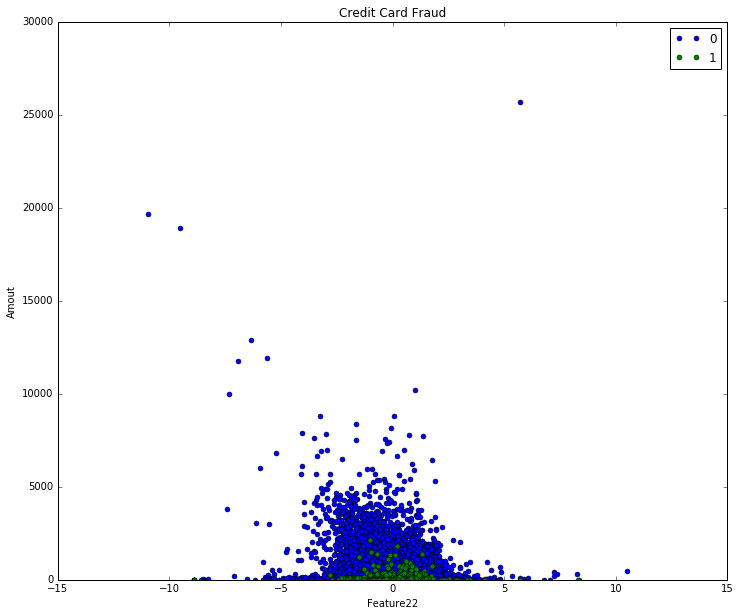

In [8]:
groups = data.groupby('Class')

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.title('Credit Card Fraud')
for name,group in groups:
    ax.plot(group.V22, group.Amount, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('Feature22')
plt.ylabel('Amout')
plt.show()

In [14]:
data['Time'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24.)
scl = StandardScaler()
data['Time'] = scl.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount'] = scl.fit_transform(data['Amount'].values.reshape(-1,1))

In [16]:
x_train, x_test = train_test_split(data, test_size = 0.2, random_state = 42)
print('X_Train Shape:'+str(x_train.shape))
print('X_Test Shape:'+str(x_test.shape))

Train Shape:(227845, 31)
Test Shape:(56962, 31)


In [19]:
x_train = x_train[x_train['Class'] == 0]
print('X_Train Shape:'+str(x_train.shape))
x_train = x_train.drop('Class', axis = 1)
print('X_Train Shape:'+str(x_train.shape))
y_test = x_test['Class'].values
print('Train Shape:'+str(y_test.shape))
x_test = x_test.drop('Class', axis = 1)
x_test = x_test.values
x_train = x_train.values

X_Train Shape:(227451, 31)
X_Train Shape:(227451, 30)
Train Shape:(56962,)


In [20]:
x_train.shape, x_test.shape

((227451, 30), (56962, 30))

In [46]:
train_tensor = torch.FloatTensor(x_train)
test_tensor = torch.FloatTensor(x_test)
train_loader = DataLoader(train_tensor,batch_size = 1000)
test_loader = DataLoader(test_tensor, batch_size = 1000)

In [47]:
class AutoEncoder_Fraud(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30,20)
        self.fc2 = nn.Linear(20,10)
        self.fc3 = nn.Linear(10,20)
        self.fc4 = nn.Linear(20,30)
        
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        
        return (x)

In [48]:
model = AutoEncoder_Fraud()
loss=nn.MSELoss()
learning_rate = 1e-2
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [49]:
for epoch in range(30):
    losses=[]
    train_data_loader = iter(train_loader)
    for t in range(len(train_data_loader)):
        data = next(train_data_loader)
        data_v = Variable(data)
        y_pred = model(data_v)
        l = loss(y_pred,data_v)        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('Epoch : {%s} Loss : {%s}' % (epoch, l.data[0]))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Epoch : {0} Loss : {tensor(0.5049)}
Epoch : {1} Loss : {tensor(0.4006)}
Epoch : {2} Loss : {tensor(0.3630)}
Epoch : {3} Loss : {tensor(0.3321)}
Epoch : {4} Loss : {tensor(0.3007)}
Epoch : {5} Loss : {tensor(0.2849)}
Epoch : {6} Loss : {tensor(0.2709)}
Epoch : {7} Loss : {tensor(0.2555)}
Epoch : {8} Loss : {tensor(0.2417)}
Epoch : {9} Loss : {tensor(0.2319)}
Epoch : {10} Loss : {tensor(0.2268)}
Epoch : {11} Loss : {tensor(0.2236)}
Epoch : {12} Loss : {tensor(0.2180)}
Epoch : {13} Loss : {tensor(0.2178)}
Epoch : {14} Loss : {tensor(0.2150)}
Epoch : {15} Loss : {tensor(0.2149)}
Epoch : {16} Loss : {tensor(0.2131)}
Epoch : {17} Loss : {tensor(0.2086)}
Epoch : {18} Loss : {tensor(0.2075)}
Epoch : {19} Loss : {tensor(0.2064)}
Epoch : {20} Loss : {tensor(0.2047)}
Epoch : {21} Loss : {tensor(0.2045)}
Epoch : {22} Loss : {tensor(0.2051)}
Epoch : {23} Loss : {tensor(0.2018)}
Epoch : {24} Loss : {tensor(0.2027)}
Epoch : {25} Loss : {tensor(0.2030)}
Epoch : {26} Loss : {tensor(0.2083)}
Epoch : {27

In [50]:
test_data_loader = iter(test_loader)
preds = []

In [51]:
for t in range(len(test_data_loader)):
        data = next(test_data_loader)
        data_v = Variable(data)
        y_pred = model(data_v)
        print('Loss:', loss(y_pred,data_v).data[0])
        if loss(y_pred,data_v).data[0] > 0.4 :
            print('Fraud')

Loss: tensor(0.2822)
Loss: tensor(0.2728)
Loss: tensor(0.2197)
Loss: tensor(0.2144)
Loss: tensor(0.2143)
Loss: tensor(0.2510)
Loss: tensor(0.3129)
Loss: tensor(0.3275)
Loss: tensor(0.2371)
Loss: tensor(0.2586)
Loss: tensor(0.2798)
Loss: tensor(0.3278)
Loss: tensor(0.2385)
Loss: tensor(0.2726)
Loss: tensor(0.2037)
Loss: tensor(0.2041)
Loss: tensor(0.4535)
Fraud
Loss: tensor(0.2042)
Loss: tensor(0.2998)
Loss: tensor(0.3455)
Loss: tensor(0.3377)
Loss: tensor(0.2676)
Loss: tensor(0.3378)
Loss: tensor(0.2256)
Loss: tensor(0.1838)
Loss: tensor(0.2972)
Loss: tensor(0.2221)
Loss: tensor(0.3247)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Loss: tensor(0.2263)
Loss: tensor(0.2149)
Loss: tensor(0.2503)
Loss: tensor(0.2299)
Loss: tensor(0.4631)
Fraud
Loss: tensor(0.2342)
Loss: tensor(0.2044)
Loss: tensor(0.2796)
Loss: tensor(0.2365)
Loss: tensor(0.2279)
Loss: tensor(0.2293)
Loss: tensor(0.2412)
Loss: tensor(0.3546)
Loss: tensor(0.2894)
Loss: tensor(0.2047)
Loss: tensor(0.2415)
Loss: tensor(0.2711)
Loss: tensor(0.2135)
Loss: tensor(0.2703)
Loss: tensor(0.2265)
Loss: tensor(0.2524)
Loss: tensor(0.2151)
Loss: tensor(0.2423)
Loss: tensor(0.2409)
Loss: tensor(0.2904)
Loss: tensor(0.3354)
Loss: tensor(0.2608)
Loss: tensor(0.3538)
Loss: tensor(0.2338)


In [29]:
y_test

array([1, 0, 0, ..., 0, 0, 0])